In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import string
import re

In [44]:
dataset = pd.read_csv("E:\data.csv")
dataset.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [45]:
dataset.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [46]:
dataset.drop(columns=["URLs", "Body"],inplace=True, axis=0)

In [47]:
dataset.isnull().sum()

Headline    0
Label       0
dtype: int64

In [48]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
ps = PorterStemmer()

def wordopt(text):
    text = text.lower()
    text = re.sub(r'https*\S+', ' ', text)
    text = re.sub(r'[@#]\S+', ' ', text)
    text = re.sub('<.*?>', '', text)
    contractions = {"don't": 'do not', "can't": 'cannot'}
    for contraction, expanded in contractions.items():
        text = text.replace(contraction, expanded)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\s{2,}', ' ', text)
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    text = ' '.join(words)
    return text


In [58]:
dataset["Headline"] = dataset["Headline"].apply(wordopt)
dataset.shape

(4009, 2)

In [59]:
dataset["Headline"]

0                 four way bob corker skewer donald trump
1       linklat war veteran comedi speak modern americ...
2              trump ’ fight corker jeopard legisl agenda
3       egypt cheiron win tieup pemex mexican onshor o...
4                       jason aldean open snl vega tribut
                              ...                        
4004                                          trend watch
4005             trump jr soon give 30minut speech 100000
4006                       ron paul trump anarch altright
4007    china accept oversea trial data bid speed drug...
4008    vice presid mike penc leav nfl game antiameric...
Name: Headline, Length: 4009, dtype: object

In [65]:
vocab_size = len(set(dataset["Headline"]))
print("Vocabulary Size:", vocab_size)

Vocabulary Size: 2830


In [67]:
x = dataset["Headline"]
y = dataset["Label"]

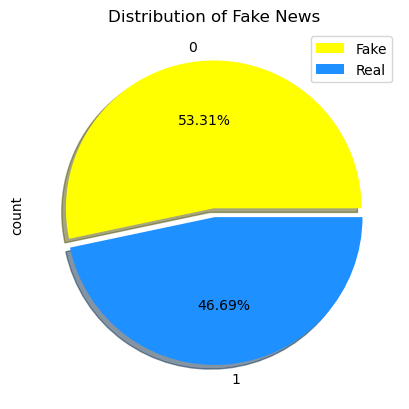

In [119]:
# Get label counts
type_counts = dataset['Label'].value_counts()
colors = ['yellow', 'DodgerBlue']
explode = (0.04, 0.02) 
type_counts.plot(kind='pie', autopct='%1.2f%%', labels=type_counts.index, colors=colors, shadow=True, explode=explode)
plt.title('Distribution of Fake News')
plt.legend(labels=['Fake', 'Real'])
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 42)

In [228]:
vectorization = TfidfVectorizer(ngram_range=(1,3), stop_words='english')
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


In [229]:
DTC = DecisionTreeClassifier(criterion='log_loss', splitter='random',random_state = 42)
DTC.fit(xv_train, y_train)
DTC.score(xv_test,y_test)
pred_dt=DTC.predict(xv_test) #this function is used to make prediction.

In [230]:
score1 = accuracy_score(y_test,pred_dt)*100
score1

82.95926849542809

In [231]:
precision1 = precision_score(y_test, pred_dt)*100
precision1

83.36713995943205

In [232]:
recall1 = recall_score(y_test, pred_dt)*100
recall1

76.96629213483146

In [233]:
from texttable import Texttable
Data = [["Classifiers", "Average Accuracy", "Average Precision","Average Recall"], ["DTC", score1,precision1,recall1]]
table = Texttable()
table.add_rows(Data)
print(table.draw())

+-------------+------------------+-------------------+----------------+
| Classifiers | Average Accuracy | Average Precision | Average Recall |
+=============+==================+===================+================+
| DTC         | 82.959           | 83.367            | 76.966         |
+-------------+------------------+-------------------+----------------+


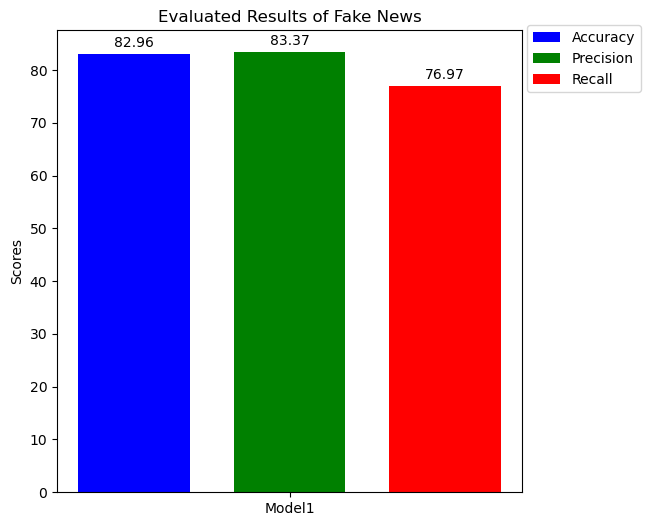

In [234]:
scores = [score1]
precision = [precision1]
recall = [recall1]
models = ["Model1"]
ind = np.arange(len(models))  
width = 0.1800 

fig, ax = plt.subplots(figsize=(6, 6))


rects1 = ax.bar(ind-0.25, scores, width, color='blue', label='Accuracy')
rects2 = ax.bar(ind, precision, width, color='green', label='Precision')
rects3 = ax.bar(ind + 0.25, recall, width, color='red', label='Recall')

# Add some text for labels, title, and axes ticks
ax.set_ylabel('Scores')
#ax.set_xlabel('Model')
ax.set_title('Evaluated Results of Fake News')
ax.set_xticks(ind)
ax.set_xticklabels(models)


ax.legend(["Accuracy", "Precision", "Recall"],bbox_to_anchor =(1.27, 1.026), ncol = 1)


# Function to add labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, 1.0*height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
               

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


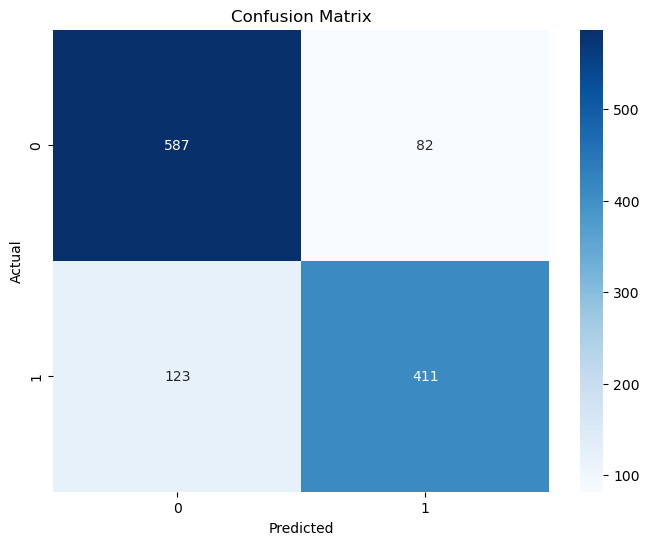

In [235]:
report = classification_report(y_test, pred_dt)
report
cm = confusion_matrix(y_test, pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()